In [35]:
import ROOT
import array
import datetime
import sys
from IPython.display import Image as Plot
def destruct(object_):
    if issubclass(type(object_), ROOT.TObject):
        object_.IsA().Destructor(object_)

#Good res
g_xres = 1000
g_yres = 500
        
sys.path.insert(0, '/Users/sdporzio/HighVoltageTask')
fermilabOffset = -6*60*60
ROOT.gStyle.SetTimeOffset(fermilabOffset);
ROOT.gStyle.SetPalette(ROOT.kRainBow);
ROOT.gStyle.SetOptStat(0)

startTime = ROOT.TDatime(2015,10,01,00,00,00).Convert()
weekTime = 604800
nWeeks = 4*8
nDays = nWeeks*7
daysPerBin = 7
endTime = startTime + weekTime*nWeeks
timeDivisions = int(nWeeks/4) + 4*100

fBL = open("Data_Events/hvEvents.dat","r")
fBL.readline()

t = 0
time = array.array("d",[])
DTblipType = []
PVblipType = []
shortBaselineStatus = []
longBaselineStatus = []
peakob = array.array("d",[])
duration = array.array("d",[])

for line in fBL:
    x = line.split()
    time.append(float(x[0]))
    DTblipType.append(x[1])
    PVblipType.append(x[2])
    shortBaselineStatus.append(x[3])
    longBaselineStatus.append(x[4])
    peakob.append(float(x[5]))
    duration.append(float(x[6]))
    t+=1

peakMax = peakob[0]
peakMin = peakob[0]
durMax = duration[0]
durMin = duration[0]
for i in range(0,t):
    if peakob[i] > peakMax:
        peakMax = peakob[i]
    if peakob[i] < peakMin:
        peakMin = peakob[i]
    if duration[i] > durMax:
        durMax = duration[i]
    if duration[i] < durMin:
        durMin = duration[i]

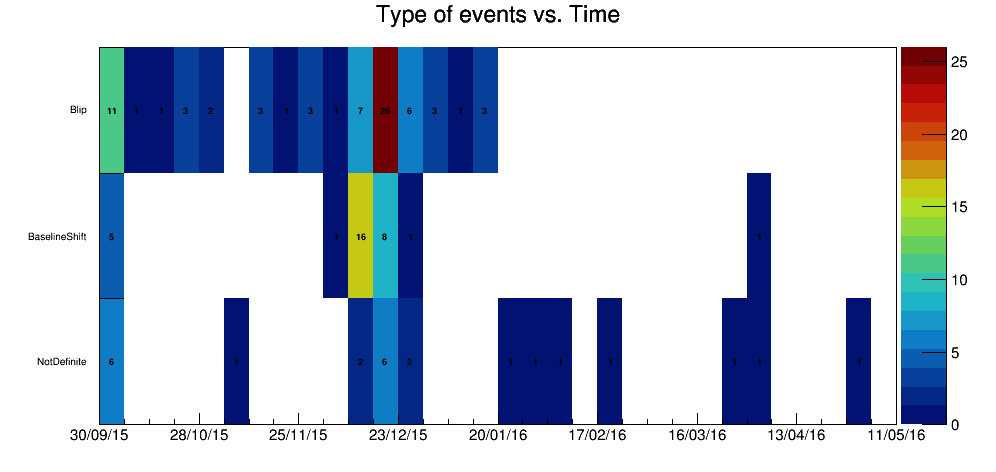

In [36]:
c1 = ROOT.TCanvas("canvas1","",g_xres,g_yres)
h1 = ROOT.TH2D("hAllVsTime","Type of events vs. Time",int(nDays/daysPerBin),startTime,endTime,3,0,3)
h1.GetXaxis().SetTimeDisplay(1)
# h1.GetXaxis().SetTimeOffset(0,"UCT")
h1.GetYaxis().SetNdivisions(3,1)
h1.GetXaxis().SetNdivisions(timeDivisions,0)
h1.GetYaxis().SetBinLabel(3,"Blip")
h1.GetYaxis().SetBinLabel(2,"BaselineShift")
h1.GetYaxis().SetBinLabel(1,"NotDefinite")

for i in range(0,t):
    if DTblipType[i] == "Blip" and PVblipType[i] == "Blip":
        bType = 2
    elif DTblipType[i] == "BaselineShift" and PVblipType[i] == "BaselineShift":
        bType = 1
    else:
        bType = 0
    h1.Fill(int(time[i]),bType)
    
h1.Draw("COLZ")
h1.Draw("SAME TEXT")

c1.SaveAs("Plots/HvAnalysis/histo1.png")
destruct(c1)
destruct(h1)
Plot("Plots/HvAnalysis/histo1.png")

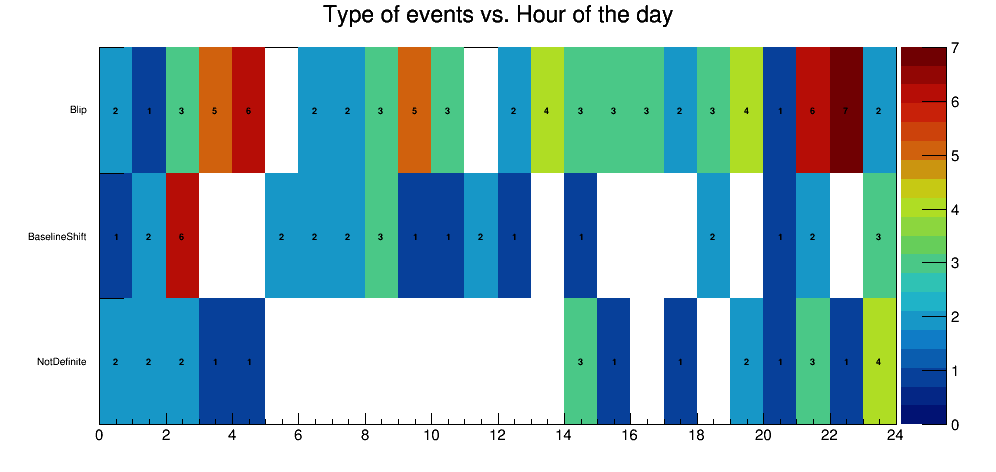

In [37]:
c1 = ROOT.TCanvas("canvas1","",g_xres,g_yres)
h1 = ROOT.TH2D("hAllHour","Type of events vs. Hour of the day",24,0,24,3,0,3)
h1.GetYaxis().SetBinLabel(3,"Blip")
h1.GetYaxis().SetBinLabel(2,"BaselineShift")
h1.GetYaxis().SetBinLabel(1,"NotDefinite")

for i in range(0,t):
    if DTblipType[i] == "Blip" and PVblipType[i] == "Blip":
        bType = 2
    elif DTblipType[i] == "BaselineShift" and PVblipType[i] == "BaselineShift":
        bType = 1
    else:
        bType = 0
    hour = ROOT.TDatime(int(time[i])).GetHour()
    h1.Fill(hour,bType)
    
h1.Draw("COLZ")
h1.Draw("SAME TEXT")

c1.SaveAs("Plots/HvAnalysis/histo2.png")
destruct(c1)
destruct(h1)
Plot("Plots/HvAnalysis/histo2.png")

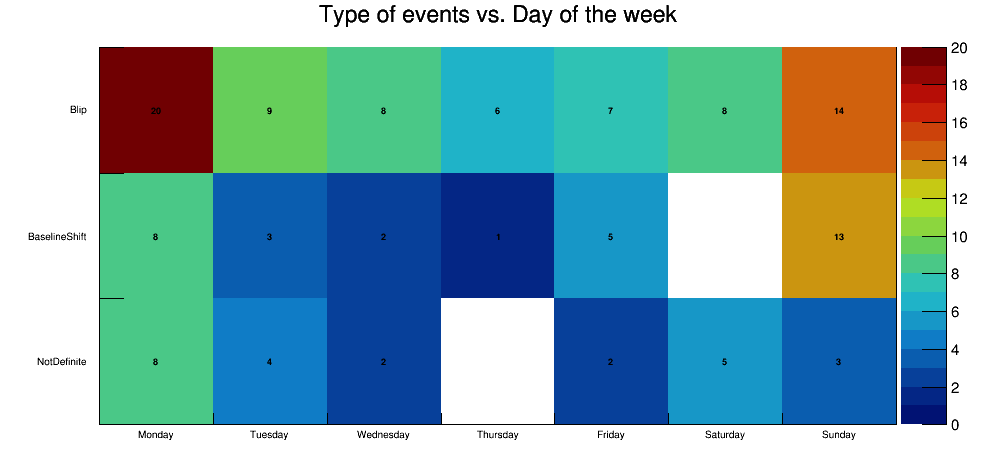

In [38]:
c1 = ROOT.TCanvas("canvas1","",g_xres,g_yres)
h1 = ROOT.TH2D("hAllDayWeek","Type of events vs. Day of the week",7,1,8,3,0,3)
h1.GetYaxis().SetBinLabel(3,"Blip")
h1.GetYaxis().SetBinLabel(2,"BaselineShift")
h1.GetYaxis().SetBinLabel(1,"NotDefinite")
h1.GetXaxis().SetBinLabel(1,"Monday")
h1.GetXaxis().SetBinLabel(2,"Tuesday")
h1.GetXaxis().SetBinLabel(3,"Wednesday")
h1.GetXaxis().SetBinLabel(4,"Thursday")
h1.GetXaxis().SetBinLabel(5,"Friday")
h1.GetXaxis().SetBinLabel(6,"Saturday")
h1.GetXaxis().SetBinLabel(7,"Sunday")

for i in range(0,t):
    if DTblipType[i] == "Blip" and PVblipType[i] == "Blip":
        bType = 2
    elif DTblipType[i] == "BaselineShift" and PVblipType[i] == "BaselineShift":
        bType = 1
    else:
        bType = 0
    dayWeek = ROOT.TDatime(int(time[i])).GetDayOfWeek()
    h1.Fill(dayWeek,bType)
    
h1.Draw("COLZ")
h1.Draw("SAME TEXT")

c1.SaveAs("Plots/HvAnalysis/histo3.png")
destruct(c1)
destruct(h1)
Plot("Plots/HvAnalysis/histo3.png")

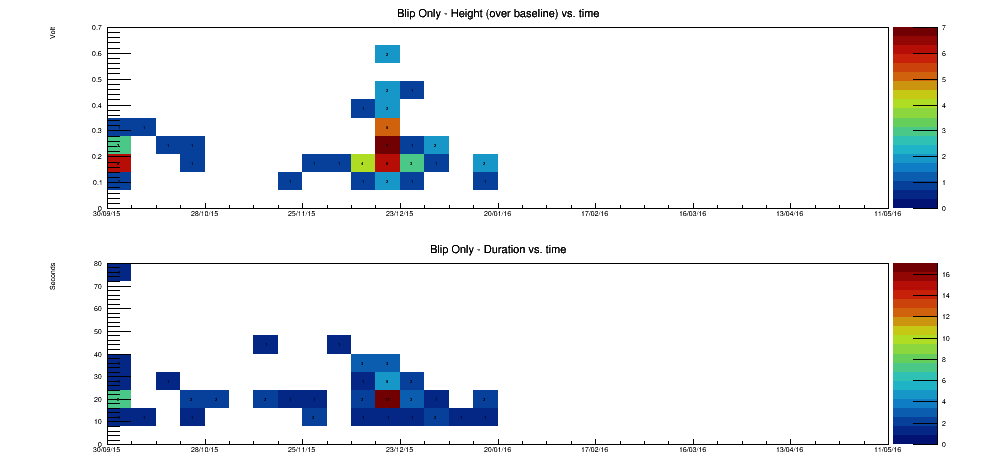

In [39]:
c1 = ROOT.TCanvas("canvas1","",g_xres,g_yres)
h1 = ROOT.TH2D("hBlipHeight","Blip Only - Height (over baseline) vs. time",int(nDays/daysPerBin),startTime,endTime,10,0,0.7)
h2 = ROOT.TH2D("hBlipDuration","Blip Only - Duration vs. time",int(nDays/daysPerBin),startTime,endTime,10,0,80)
h1.GetXaxis().SetTimeDisplay(1)
h1.GetXaxis().SetNdivisions(timeDivisions,0)
h1.GetYaxis().SetTitle("Volt")
h2.GetXaxis().SetTimeDisplay(1)
h2.GetXaxis().SetNdivisions(timeDivisions,0)
h2.GetYaxis().SetTitle("Seconds")

for i in range(0,t):
    if DTblipType[i] == "Blip" and PVblipType[i] == "Blip":
        bType = 2
    elif DTblipType[i] == "BaselineShift" and PVblipType[i] == "BaselineShift":
        bType = 1
    else:
        bType = 0
    if bType == 2:
        h1.Fill(int(time[i]),peakob[i])
        h2.Fill(int(time[i]),duration[i])
    
c1.Divide(1,2)
c1.cd(1)
h1.Draw("COLZ")
h1.Draw("SAME TEXT")
c1.cd(2)
h2.Draw("COLZ")
h2.Draw("SAME TEXT")

c1.SaveAs("Plots/HvAnalysis/histo4.png")
destruct(c1)
destruct(h1)
destruct(h2)
Plot("Plots/HvAnalysis/histo4.png")

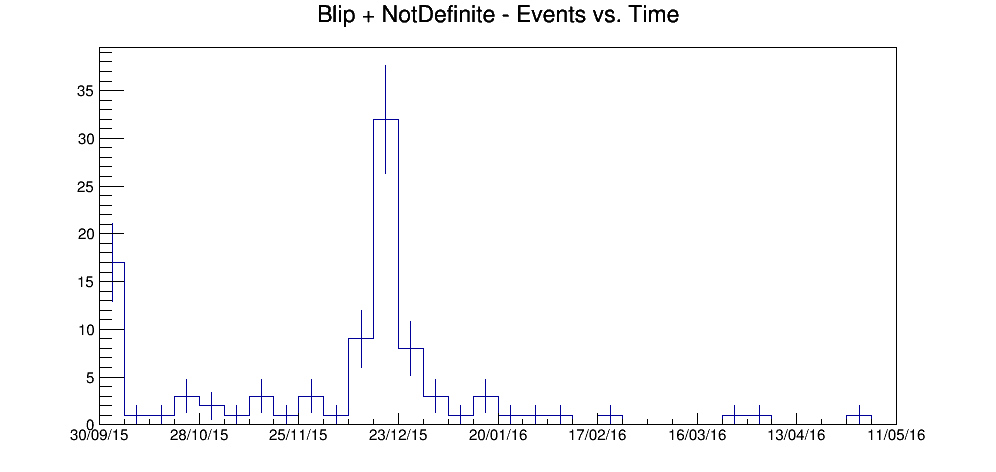

In [40]:
c1 = ROOT.TCanvas("canvas1","",g_xres,g_yres)
h1 = ROOT.TH1D("hBlipNumber","Blip + NotDefinite - Events vs. Time",int(nDays/daysPerBin),startTime,endTime)
h1.GetXaxis().SetTimeDisplay(1)
h1.GetXaxis().SetNdivisions(timeDivisions,0)
for i in range(0,t):
    if DTblipType[i] == "Blip" and PVblipType[i] == "Blip":
        bType = 2
    elif DTblipType[i] == "BaselineShift" and PVblipType[i] == "BaselineShift":
        bType = 1
    else:
        bType = 0
    if bType == 2 or bType == 0:
        h1.Fill(int(time[i]))

h1.Draw("EH")

c1.SaveAs("Plots/HvAnalysis/histo5.png")
destruct(c1)
destruct(h1)
destruct(h2)
Plot("Plots/HvAnalysis/histo5.png")

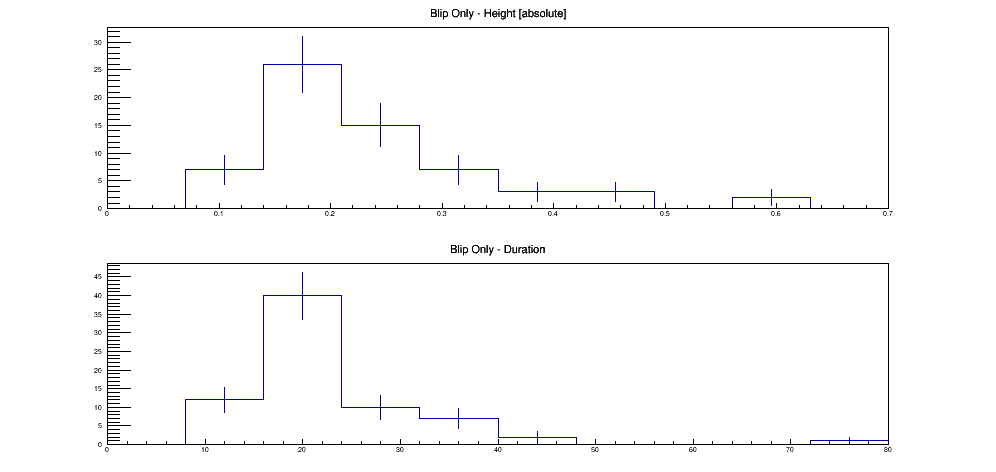

In [41]:
c1 = ROOT.TCanvas("canvas1","",g_xres,g_yres)
h1 = ROOT.TH1D("hBlipHeight","Blip Only - Height [absolute]",10,0,0.7)
h2 = ROOT.TH1D("hBlipDuration","Blip Only - Duration",10,0,80)

for i in range(0,t):
    if DTblipType[i] == "Blip" and PVblipType[i] == "Blip":
        bType = 2
    elif DTblipType[i] == "BaselineShift" and PVblipType[i] == "BaselineShift":
        bType = 1
    else:
        bType = 0
    if bType == 2:
        h1.Fill(abs(peakob[i]))
        h2.Fill(duration[i])

c1.Divide(1,2)
c1.cd(1)
h1.Draw("EH")
c1.cd(2)
h2.Draw("EH")

c1.SaveAs("Plots/HvAnalysis/histo6.png")
destruct(c1)
destruct(h1)
destruct(h2)
Plot("Plots/HvAnalysis/histo6.png")